In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
import numpy as np

In [2]:
btc = pd.read_csv("./dataset/btc.csv")

In [3]:
cr = CurrencyRates()
cr.get_rate("USD", "EUR")

0.858000858000858

In [4]:
btc["High"] = round(cr.convert("USD", "EUR", btc["High"]),2)
btc["Low"] = round(cr.convert("USD", "EUR", btc["Low"]),2)
btc.set_index(btc["Date"], inplace=True)

In [5]:
btc_eur = btc[["Date", "Low", "High", "Volume"]]
btc_eur.columns = ["Date", "Low (EUR)", "High (EUR)", "Volume (Billion)"]

In [6]:
btc_describe = btc_eur.describe().round(2)
btc_describe = btc_describe.astype(object).T

In [7]:
btc_eur_standard = btc_describe[["min", "max", "mean"]]
btc_eur_standard

,min,max,mean
Low (EUR),147.16,16279.79,3059.41
High (EUR),181.67,17236.38,3240.73
Volume (Billion),5914570.0,45105733173.0,4389184819.19


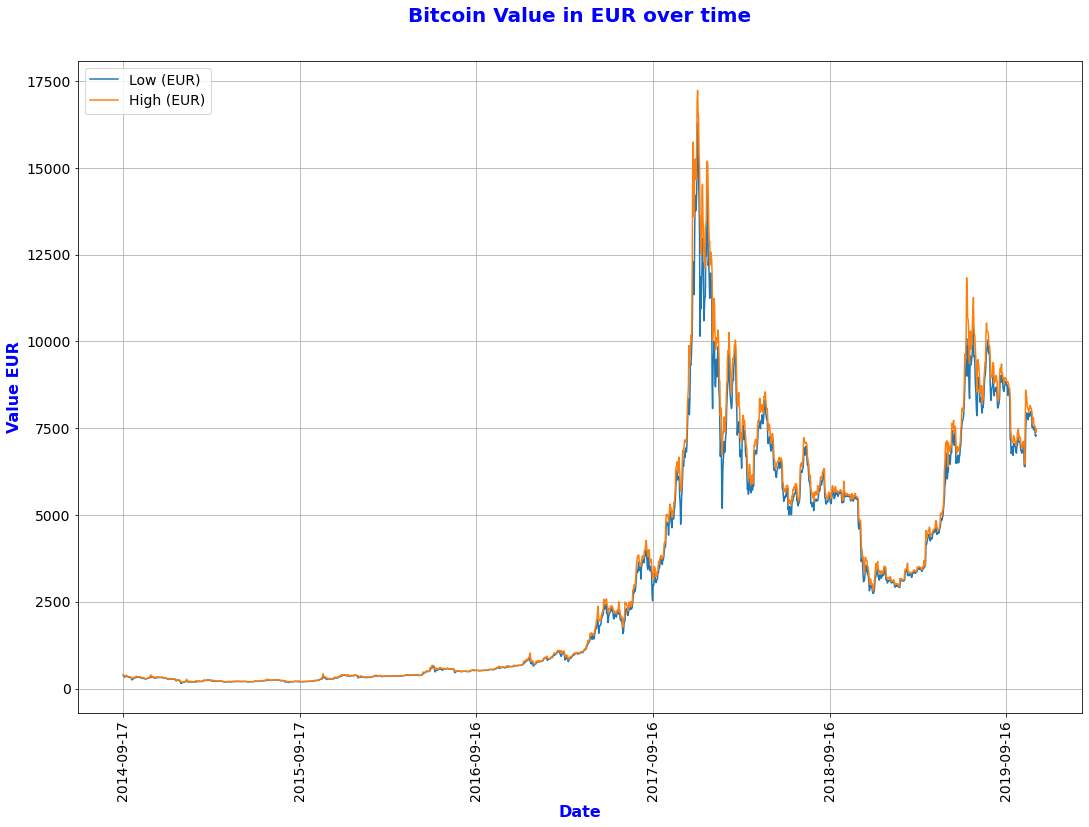

<Figure size 432x288 with 0 Axes>

In [8]:
btc_eur[["Low (EUR)", "High (EUR)"]].plot(kind="line", grid=True, figsize=(18,12), rot=90, fontsize=14, xticks=range(0, 2019, 365))
plt.legend(loc=2, fontsize=14)
plt.title("Bitcoin Value in EUR over time", fontsize=20, c="b", fontweight="bold", y=1.05)
plt.xlabel("Date", fontsize=16, c="b", fontweight="bold")
plt.ylabel("Value EUR", fontsize=16, c="b", fontweight="bold")
plt.show()
#plt.savefig('BTC.pdf')

In [9]:
#btc_eur.to_csv(r"D:\nordcloud\dataset\btc_eur.csv", index=False, header=True)